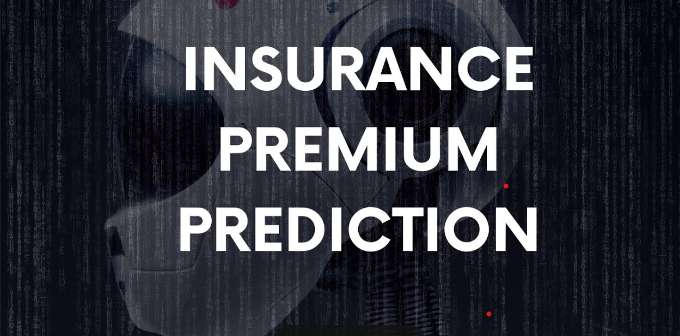

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  
id      

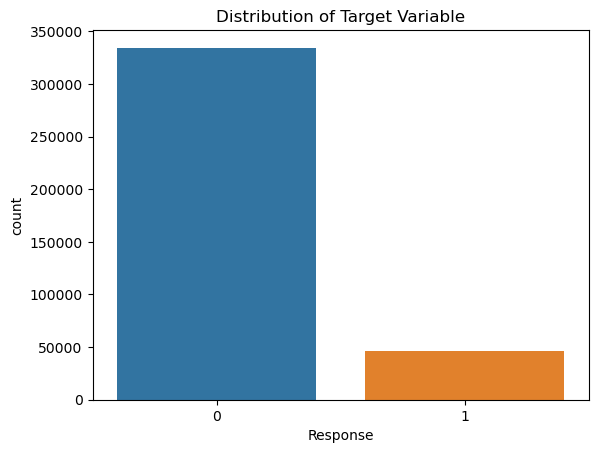

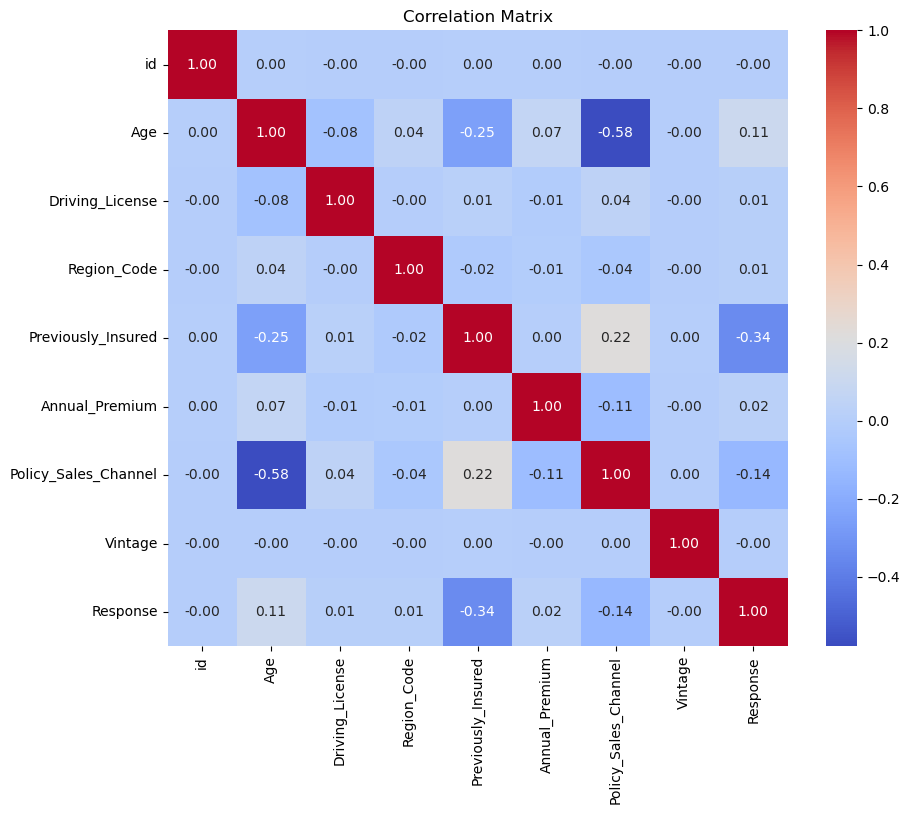

In [1]:






import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\saad\Downloads\data.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Distribution of the target variable
sns.countplot(x='Response', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [2]:
print(df.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [3]:
# Remove leading/trailing spaces from column names if any
df.columns = df.columns.str.strip()

# Print again to check
print(df.columns)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [4]:
# Check the data types of each column
print(df.dtypes)

# Look specifically for the target column
if 'Response' in df.columns:
    print(df['Response'].dtype)
else:
    print("Column 'Response' not found!")


id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object
int64


In [5]:
# Print specific columns to verify their content
print(df.columns)

# Try accessing the 'Response' column directly
try:
    print(df['Response'].head())
except KeyError:
    print("The 'Response' column is still not found. Please check the column names again.")


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64


In [6]:
# Find columns that might be similar to 'Response'
possible_columns = [col for col in df.columns if 'response' in col.lower()]
print("Possible target columns:", possible_columns)


Possible target columns: ['Response']


In [7]:
# Manually assign if you find the correct column name
target_column = 'Response'  # Replace with the correct column name

X = df.drop(target_column, axis=1)
y = df[target_column]


In [8]:
# Directly access the 'Response' column
try:
    y = df['Response']
    print("Successfully accessed the 'Response' column.")
except KeyError:
    print("Failed to access the 'Response' column.")


Successfully accessed the 'Response' column.


In [9]:
# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Re-assign features and target
X = df.drop('Response', axis=1)
y = df['Response']


In [10]:
# Assign features and target
X = df.drop('Response', axis=1)
y = df['Response']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Age', 'Annual_Premium', 'Vintage']),
        ('cat', OneHotEncoder(), ['Gender', 'Vehicle_Age', 'Vehicle_Damage'])
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f'Model Accuracy: {score:.2f}')


Model Accuracy: 0.87


In [17]:
# Assuming the last few feature importances are less important
if len(importances) > len(all_feature_names):
    importances = importances[:len(all_feature_names)]
    print("Manually dropped less important feature importances.")


Manually dropped less important feature importances.


In [18]:
# Debug: Print the feature importances and feature names
print("Feature Importances Length:", len(importances))
print("All Feature Names Length:", len(all_feature_names))

print("Feature Importances:", importances)
print("Feature Names:", all_feature_names)


Feature Importances Length: 10
All Feature Names Length: 10
Feature Importances: [0.12779293 0.17120362 0.19009794 0.00245444 0.00263772 0.00420513
 0.01059147 0.00211338 0.04398079 0.04084908]
Feature Names: ['Age' 'Annual_Premium' 'Vintage' 'Gender_Female' 'Gender_Male'
 'Vehicle_Age_1-2 Year' 'Vehicle_Age_< 1 Year' 'Vehicle_Age_> 2 Years'
 'Vehicle_Damage_No' 'Vehicle_Damage_Yes']


In [19]:
# Check the one-hot encoded feature names
if encoder is not None:
    encoded_feature_names = encoder.get_feature_names_out(categorical_features)
    print("Encoded Feature Names:", encoded_feature_names)


Encoded Feature Names: ['Gender_Female' 'Gender_Male' 'Vehicle_Age_1-2 Year'
 'Vehicle_Age_< 1 Year' 'Vehicle_Age_> 2 Years' 'Vehicle_Damage_No'
 'Vehicle_Damage_Yes']


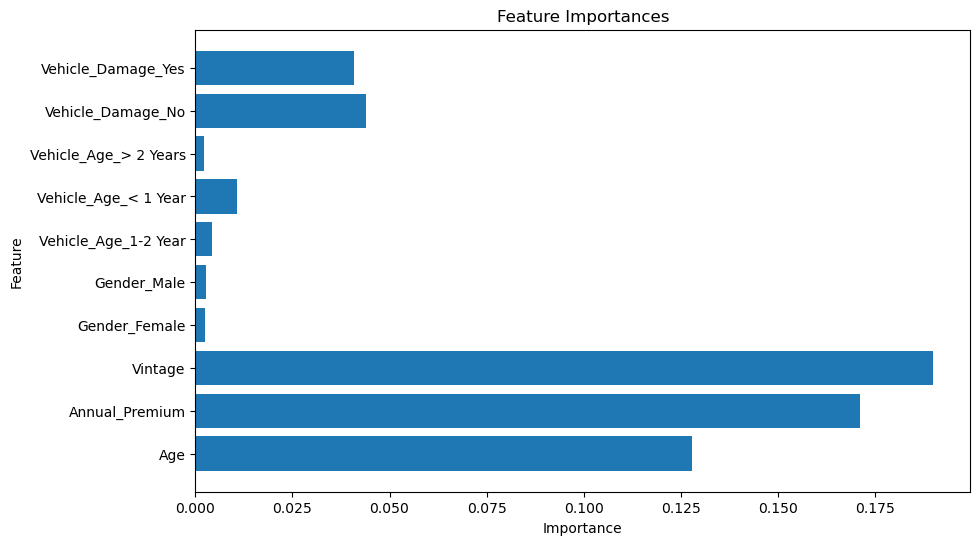

In [20]:
if len(importances) == len(all_feature_names):
    plt.figure(figsize=(10, 6))
    plt.barh(all_feature_names, importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importances')
    plt.show()
else:
    print("The number of feature importances does not match the number of feature names.")
    # Optional: You could manually adjust or drop features to make them match


Accuracy: 0.8713757182965548
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93    100195
           1       0.39      0.07      0.12     14138

    accuracy                           0.87    114333
   macro avg       0.64      0.53      0.53    114333
weighted avg       0.82      0.87      0.83    114333



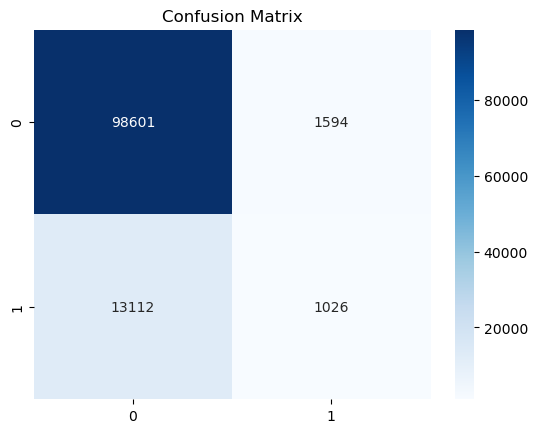

ROC-AUC Score: 0.8422809253741877


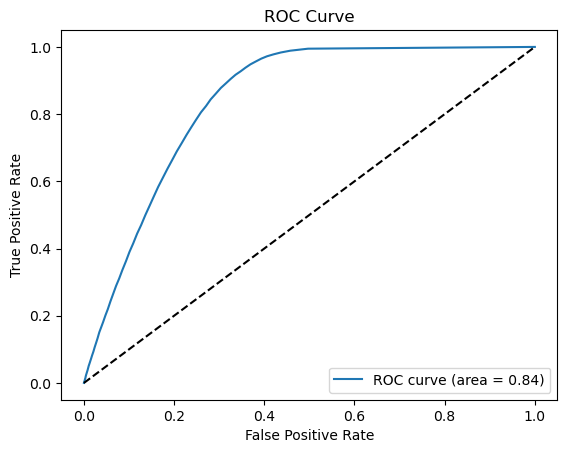

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

# Predictions on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
